# readme
descrip: plot steric height change (future minus historic time) contours in the North Atlantic (use transient minus control to account for model drift) <br>

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05 <br>
v1.2 DL 2021Apr25 <br>
v1.3 DL 2021Apr27 <br>
v1.4 DL 2021May11 make publication-ready pic <br>
v1.5 DL 2021May21 combine steric height increases and bathymetry bias into one fig <br>
v1.6 DL 2021Jun04 pivot to CESM-HR special volume paper <br>

extra notes: <br>
Fig 5 of the CESM-HR special volume paper <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import matplotlib.patches as mpatches
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.2.130:40069")
client

Client Scheduler: tcp://10.73.2.130:40069 Dashboard: http://10.73.2.130:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters and read data

In [3]:
chunks_HR = {'nlat':800,'nlon':900}
chunks_LR = {'nlat':384,'nlon':320}

# === North Atlantic ===
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
lon1, lon2 = -100, -40
lat1, lat2 = 10, 57

nlon1_t12, nlon2_t12 = 50, 800
nlat1_t12, nlat2_t12 = 1200, 2100

nlon1_g16, nlon2_g16 = 260, 321
nlat1_g16, nlat2_g16 = 200, 370
# ========================

# === Gulf of Maine (GMa) ===
lat1_GMa, lat2_GMa = 35, 55
lon1_GMa, lon2_GMa = -75, -50 # GMa: Gulf of Maine

lon1b_GMa, lon2b_GMa = -71+360, -66+360  # b: box, highlight region with a box 
lat1b_GMa, lat2b_GMa = 42, 45
# ===========================

# === Gulf of Maxico (GMe) ===
lat1_GMe, lat2_GMe = 15, 35
lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico

lon1b_GMe, lon2b_GMe = -95+360, -85+360 # b: box, highlight region with a box 
lat1b_GMe, lat2b_GMe = 23, 28
# ============================

outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'StericHeightContourGulfMaineMexico_2021Jun17.png'

read steric height files <br>
control HR (CH)

In [4]:
infile_h_rst_CH = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
# infiles_TH
ds_h_rst_CH_raw = xr.open_dataset(infile_h_rst_CH, chunks=chunks_HR)
print(ds_h_rst_CH_raw.time)
time_h_rst_CH=ds_h_rst_CH_raw.time.to_pandas().index.shift(1850-250,'Y') # 1850 --> 250
ds_h_rst_CH = ds_h_rst_CH_raw.assign_coords(time=time_h_rst_CH)
ds_h_rst_CH

<xarray.DataArray 'time' (time: 251)>
array([cftime.DatetimeNoLeap(250, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(251, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(252, 12, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(498, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(499, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00


<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 800, 900), meta=np.ndarray>

transient HR (TH)

In [5]:
infile_h_rst_TH = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
# infiles_TH
ds_h_rst_TH = xr.open_dataset(infile_h_rst_TH, chunks=chunks_HR)
ds_h_rst_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 800, 900), meta=np.ndarray>

In [6]:
infile0_HR = ('/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0250-02-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-05 at 03:26:45.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    52176371
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0

transient LR 

In [7]:
infile_h_rst_TL = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_h_rst_TL = xr.open_dataset(infile_h_rst_TL, chunks=chunks_LR)
ds_h_rst_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 250)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(250, 384, 320), meta=np.ndarray>

Control LR (CL)

In [8]:
infile_h_rst_CL = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.B1850C5.ne30g16.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_h_rst_CL_raw = xr.open_dataset(infile_h_rst_CL, chunks=chunks_LR)
print(ds_h_rst_CL_raw.time)
time_h_rst_CL=ds_h_rst_CL_raw.time.to_pandas().index.shift(1850-250,'Y') # 1850 --> 250
ds_h_rst_CL = ds_h_rst_CL_raw.assign_coords(time=time_h_rst_CL)
ds_h_rst_CL

<xarray.DataArray 'time' (time: 246)>
array([cftime.DatetimeNoLeap(250, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(251, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(252, 12, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(498, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(499, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 246)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(246, 384, 320), meta=np.ndarray>

In [9]:
infile0_LR = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
  * time                  (time) object 1850-02-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ...                    ...
    transport_components  (transport_comp, nchar) |S1 ...
    transport_regions     (transport_reg, nchar) |S1 ...
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nchar, nlat, nlon, transport_comp, transport_reg
Data variables: (12/137)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp, nchar) |S1 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    XBLT                  (time, nlat, nlon) float32 ...
    TBLT                  (time, nlat, nlon) float32 ...
    BSF                   (time, nlat, nlon) float32 ...
    MOC                   (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
    N_HEAT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
    N_SALT                (time, transport_reg, transport_comp, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

In [10]:
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))


infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))

# ds_g16_rn = ds_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
# ds_t12_rn = ds_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
# weightfile_t12_g16deg = ('/scratch/user/dapengli/Projects4iHESP/'
#                        'Project_SeaLevelUSEastCoast_2021Mar30/python_scripts/'
#                       'bilinear_POPt12_g16_Global_periodic_2021Apr12.nc')
# regridder_t12_g16deg = xe.Regridder(ds_t12_rn, ds_g16_rn, method='bilinear', 
#                                     periodic=True, filename=weightfile_t12_g16deg, 
#                                     reuse_weights=True) # 
# regridder_t12_g16deg

In [11]:
# infile_etopo = '/ihesp/user/dapengli/obs_dat/bathymetry_ETOPO5_2021Apr27/data.nc'
# ds_etopo = xr.open_dataset(infile_etopo)
# ds_etopo

# ds_etopo_rn = ds_etopo.rename({'X': 'lon', 'Y': 'lat'}) # rn: rename
# ds_etopo_rn

# data analysis 

In [12]:
# bathy_etopo=ds_etopo_rn.elev
# bathy_etopo=-bathy_etopo.where(ds_etopo_rn.elev<0,np.nan) 
# # mask land topo as nan, make bathy positive values

# bathy_NA_etopo = bathy_etopo.sel(lon=slice(lon1+360,lon2+360),
#                                  lat=slice(lat2,lat1))

In [13]:
h_rst1_TH = ds_h_rst_TH.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_CH = ds_h_rst_CH.h_rst.sel(time=slice('2001','2020')).mean('time')
# h_rst1_gl_av_TH = h_rst1_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
# h_rsta1_TH = h_rst1_TH #- h_rst1_gl_av_TH

h_rst2_TH = ds_h_rst_TH.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_CH = ds_h_rst_CH.h_rst.sel(time=slice('2081','2100')).mean('time')
# h_rst2_gl_av_TH = h_rst2_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
# h_rsta2_TH = h_rst2_TH #- h_rst2_gl_av_TH

dh_rst_THmCH = (h_rst2_TH-h_rst1_TH) - (h_rst2_CH-h_rst1_CH)

# force to compute for xesmf, drop ULONG and ULAT since the weight files do not have these coordinates
dh_rst_THmCH = dh_rst_THmCH.compute()
dh_rst_NA_THmCH = dh_rst_THmCH.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))
dh_rst_THmCH

<xarray.DataArray 'h_rst' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: nlat, nlon

In [14]:
h_rst1_TL = ds_h_rst_TL.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_CL = ds_h_rst_CL.h_rst.sel(time=slice('2001','2020')).mean('time')
# h_rst1_gl_av_TH = h_rst1_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
# h_rsta1_TH = h_rst1_TH #- h_rst1_gl_av_TH

h_rst2_TL = ds_h_rst_TL.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_CL = ds_h_rst_CL.h_rst.sel(time=slice('2081','2100')).mean('time')
# h_rst2_gl_av_TH = h_rst2_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
# h_rsta2_TH = h_rst2_TH #- h_rst2_gl_av_TH

dh_rst_TLmCL = (h_rst2_TL-h_rst1_TL) - (h_rst2_CL-h_rst1_CL)

# force to compute for xesmf, drop ULONG and ULAT since the weight files do not have these coordinates
# dh_rst_TLmCL = dh_rst_TLmCL.drop(['ULONG','ULAT']).compute()
dh_rst_NA_TLmCL = dh_rst_TLmCL.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))
dh_rst_TLmCL

<xarray.DataArray 'h_rst' (nlat: 384, nlon: 320)>
dask.array<sub, shape=(384, 320), dtype=float64, chunksize=(384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
Dimensions without coordinates: nlat, nlon

# make pics

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


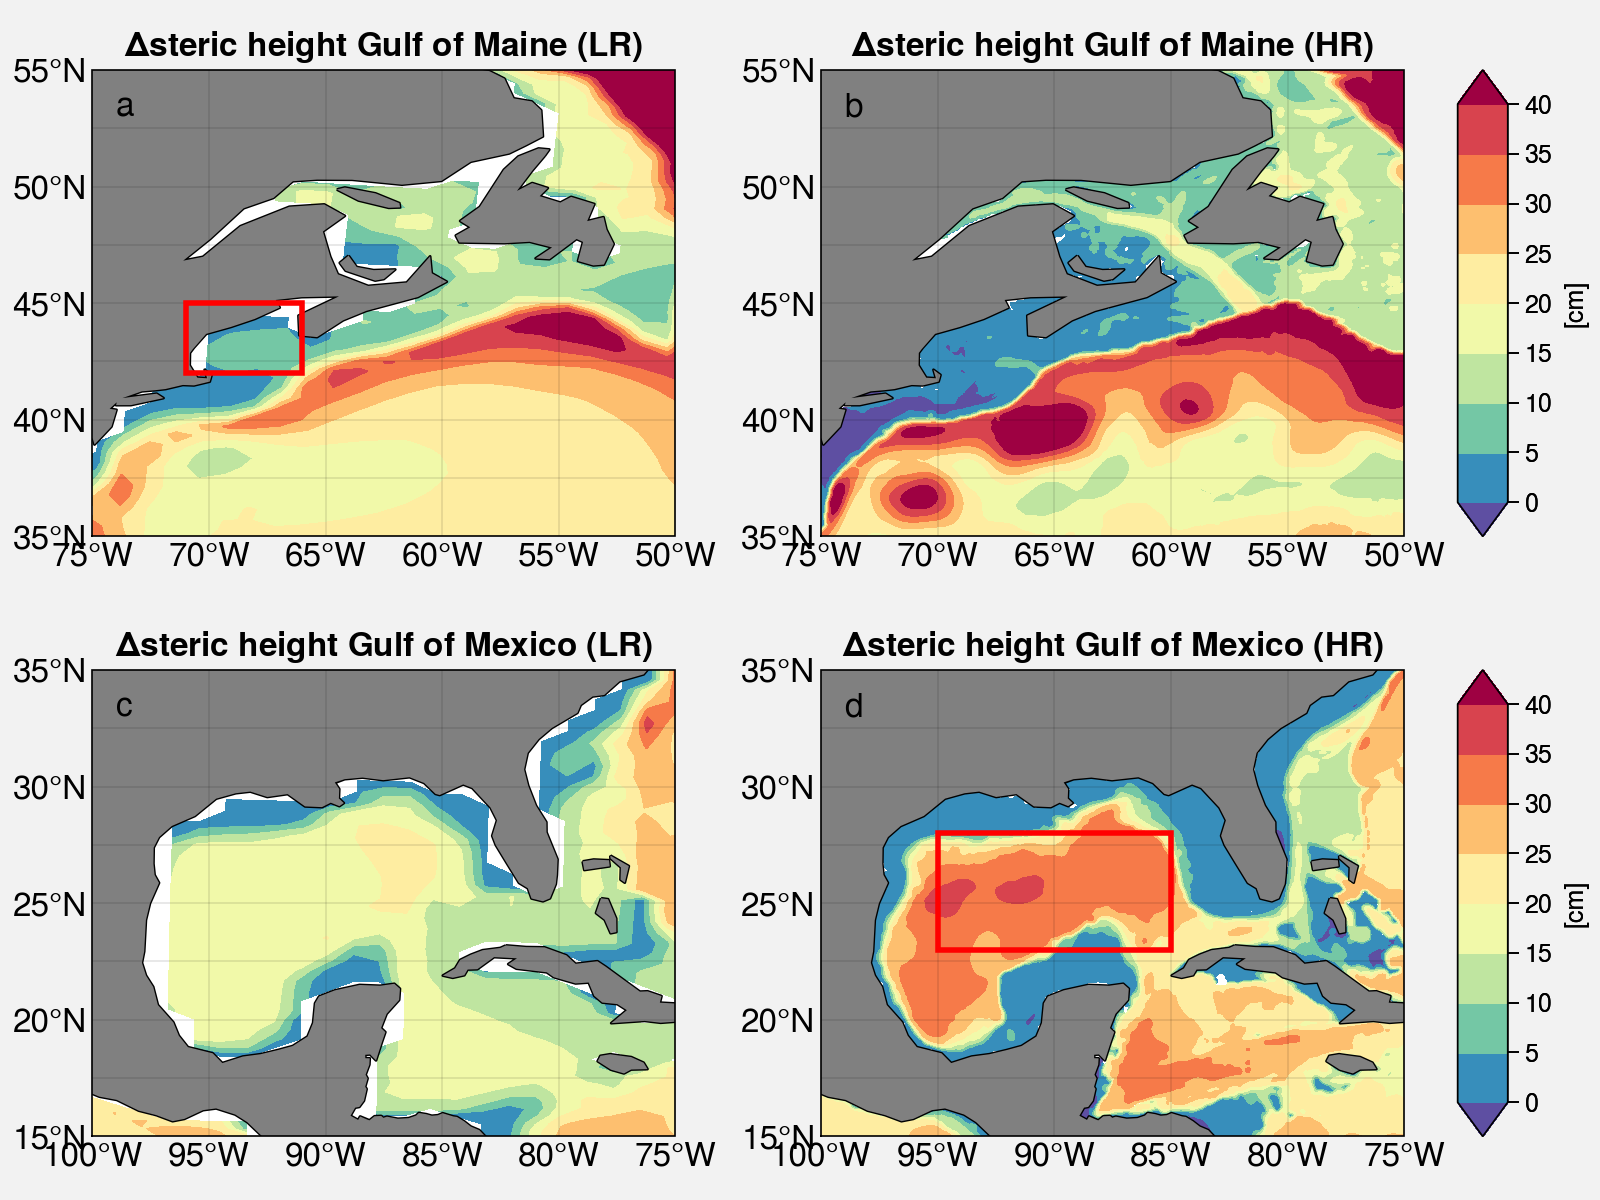

In [15]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='8in',height='6in')

m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_rst_NA_TLmCL, levels=np.arange(0,40+1,5), 
        transform=pc, vmin=0, vmax=40, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[0,0].set_title(r'$\Delta$steric height Gulf of Maine (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-74, 53, 'a', transform=pc, fontsize=12)
ap=axs[0,0].add_patch(mpatches.Rectangle(xy=[lon1b_GMa, lat1b_GMa], 
                                         width=(lon2b_GMa-lon1b_GMa), height=(lat2b_GMa-lat1b_GMa),
                                         facecolor='none',transform=pc,
                                         linewidth=2, edgecolor='r'))
ap.set_zorder(2)


m01=axs[0,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_rst_NA_THmCH, levels=np.arange(0,40+1,5), 
        transform=pc, vmin=0, vmax=40, cmap="spectral_r", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title(r'$\Delta$steric height Gulf of Maine (HR)', fontsize=12, fontweight='bold')
axs[0,1].text(-74, 53, 'b', transform=pc, fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01,loc='r', label='[cm]',width='2em',shrink=0.9)


m10=axs[1,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_rst_NA_TLmCL, levels=np.arange(0,40+1,5), 
        transform=pc, vmin=0, vmax=40, cmap="spectral_r", extend='both')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[1,0].set_title(r'$\Delta$steric height Gulf of Mexico (LR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99, 33, 'c', transform=pc, fontsize=12)


m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_rst_NA_THmCH, levels=np.arange(0,40+1,5), 
        transform=pc, vmin=0, vmax=40, cmap="spectral_r", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title(r'$\Delta$steric height Gulf of Mexico (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99, 33, 'd', transform=pc, fontsize=12)
ap=axs[1,1].add_patch(mpatches.Rectangle(xy=[lon1b_GMe, lat1b_GMe], 
                                         width=(lon2b_GMe-lon1b_GMe), height=(lat2b_GMe-lat1b_GMe),
                                         facecolor='none',transform=pc,
                                         linewidth=2, edgecolor='r'))
ap.set_zorder(2)
# add colorbar
cb = axs[1,1].colorbar(m11,loc='r', label='[cm]',width='2em',shrink=0.9)


fig1.savefig(pic1,bbox_inches='tight')